In [104]:
%matplotlib inline
import pandas
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

In [105]:
students = pandas.read_csv('Course Fair Survey Data_for_SP19.csv')

In [106]:
# Stores a dictionary of studentIDs and the courses they selected
student_dict = {}

# Stores the name of the course
course_list = []

# Iterate through every student
for idx, student in students.iterrows():
    # Get the unique student id
    student_id = student['Unique ID']
    
    # Each student has chosen up to 5 classes to select
    # Extract the course code from the class name
    course_code1 = str(student['C1']).split()[0][:-1]
    course_code2 = str(student['C2']).split()[0][:-1]
    course_code3 = str(student['C3']).split()[0][:-1]
    course_code4 = str(student['C4']).split()[0][:-1]
    course_code5 = str(student['C5']).split()[0][:-1]
        
    # Construct the list of all 5 chosen courses
    all_courses = [course_code1, course_code2, course_code3, course_code4, course_code5]
    
    # Get rid of any na courses where people didn't fill out the box
    all_courses_no_empty = list(filter(lambda name: name != "na", all_courses))
    
    # Add the student and chosen classes to the dictionary
    student_dict[student_id] = all_courses_no_empty
    
    # Add the courses to the course_list if they are not there already
    course_list = list(set(course_list).union(set(all_courses_no_empty)))
    
print(course_list)

['ENGR3440', 'ENGR3531/MTH2131', 'ENGR3299A', 'ENGR2320', 'AHSE3515', 'AHSE2515', 'MTH2188', 'AHSE2141/ENGR2141', 'MTH2210', 'ENGR3392', 'ENGR2350', 'ENGR3252', 'AHSE2515A', 'ENGR3600', 'ENGR3430', 'AHSE', 'ENGR2160', 'ENGR3370', 'ENGR2510', 'ENGR3345', 'ENGR3420', 'ENGR2410', 'SCI2050', 'ENGR1330', 'SCI1130', 'ENGR3525', 'ENGR4190', 'ENGR2250', 'AHSE1515', 'SUST3301', 'ENGR2330', 'AHSE2155', 'ENGR3290', 'ENGR4290', 'SCI1399', 'ENGR2199', 'ENGR3599', 'SCI1410', 'AHSE2160/SCI1260', 'ENGR3210', 'ENGR2420', 'AHSE0112', 'AHSE2199A', 'XYZ', 'SCI1230', 'CIE2019A', 'AHSE2199', 'AHSE3190', 'ENGR4599', 'MTH3120', 'AHSE4190']


In [107]:
# Order the course list in alphabetical order
#course_list = sorted(course_list)

# The adjacency matrix, with courses as vertices and edges indicating two classes were chosen by the same student
conflicts = np.zeros((len(course_list), len(course_list)))    

# For each student, if they want multiple courses, mark those points in the adjacency matrix
for student in student_dict:
    if len(student_dict[student]) > 1:
        classes_wanted = student_dict[student]
        
        # Get each unique pair of (different) courses taught
        for i in range(len(classes_wanted)):
            for j in range (i+1, len(classes_wanted)):
                # Get the name of the class that is wanted
                class1 = classes_wanted[i]
                class2 = classes_wanted[j]
                
                # Using the indices of the classes in course_list, update adjacency value
                conflicts[course_list.index(class1)][course_list.index(class2)] += 1
                conflicts[course_list.index(class2)][course_list.index(class1)] += 1
print(conflicts)

[[0. 1. 0. ... 0. 1. 1.]
 [1. 0. 1. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 2. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 2. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]]


In [108]:
# Find the sum of the conflicts for each class by summing the row values
summation = np.sum(conflicts,axis=1)

# Stores a dictionary relating the course and the total conflicts
total_course_conflicts = []

# For each course, add a dictionary with the course id and the conflict summation
for idx, course in enumerate(course_list):
    total_course_conflicts.append((course,summation[idx]))

total_course_conflicts.sort(key=lambda x:x[1], reverse=True)
print(total_course_conflicts)


[('ENGR2250', 250.0), ('AHSE1515', 204.0), ('CIE2019A', 160.0), ('ENGR2510', 143.0), ('ENGR4190', 130.0), ('MTH3120', 125.0), ('SCI1410', 123.0), ('ENGR2320', 115.0), ('ENGR3525', 114.0), ('ENGR2330', 110.0), ('MTH2188', 108.0), ('SCI2050', 106.0), ('AHSE2199', 89.0), ('ENGR2350', 86.0), ('AHSE2160/SCI1260', 81.0), ('ENGR2420', 80.0), ('ENGR3599', 71.0), ('SCI1230', 70.0), ('ENGR3420', 69.0), ('ENGR3370', 68.0), ('ENGR1330', 66.0), ('ENGR3430', 64.0), ('ENGR3345', 59.0), ('MTH2210', 56.0), ('AHSE2515', 55.0), ('ENGR3531/MTH2131', 54.0), ('SCI1130', 49.0), ('AHSE2199A', 45.0), ('AHSE2141/ENGR2141', 42.0), ('ENGR3210', 42.0), ('ENGR3392', 40.0), ('ENGR2410', 40.0), ('ENGR3252', 39.0), ('XYZ', 39.0), ('ENGR3440', 38.0), ('AHSE0112', 31.0), ('ENGR3299A', 28.0), ('ENGR3290', 25.0), ('AHSE2155', 23.0), ('AHSE4190', 22.0), ('AHSE2515A', 21.0), ('ENGR3600', 21.0), ('SCI1399', 19.0), ('ENGR4290', 18.0), ('AHSE3190', 15.0), ('AHSE3515', 11.0), ('ENGR2160', 11.0), ('SUST3301', 10.0), ('ENGR2199',

In [109]:
# Stores the sorted adjacency matrix
sorted_conflicts = []#np.zeros((len(course_list), len(course_list)))

# For each row in the ordered total_course_conflicts, put that row into a new ordered matrix
for name,num in total_course_conflicts:
    # Stores the row for the class in the unordered matrix
    original_row = course_list.index(name)
                
    # Add the row to the ordered position
    sorted_conflicts.append(conflicts[original_row].tolist())


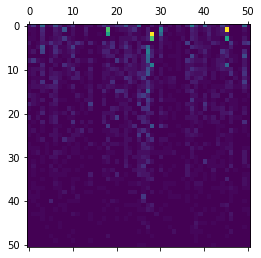

In [110]:
plt.matshow(sorted_conflicts)
plt.show()

{0: 'ENGR3440', 1: 'ENGR3531/MTH2131', 2: 'ENGR3299A', 3: 'ENGR2320', 4: 'AHSE3515', 5: 'AHSE2515', 6: 'MTH2188', 7: 'AHSE2141/ENGR2141', 8: 'MTH2210', 9: 'ENGR3392', 10: 'ENGR2350', 11: 'ENGR3252', 12: 'AHSE2515A', 13: 'ENGR3600', 14: 'ENGR3430', 15: 'AHSE', 16: 'ENGR2160', 17: 'ENGR3370', 18: 'ENGR2510', 19: 'ENGR3345', 20: 'ENGR3420', 21: 'ENGR2410', 22: 'SCI2050', 23: 'ENGR1330', 24: 'SCI1130', 25: 'ENGR3525', 26: 'ENGR4190', 27: 'ENGR2250', 28: 'AHSE1515', 29: 'SUST3301', 30: 'ENGR2330', 31: 'AHSE2155', 32: 'ENGR3290', 33: 'ENGR4290', 34: 'SCI1399', 35: 'ENGR2199', 36: 'ENGR3599', 37: 'SCI1410', 38: 'AHSE2160/SCI1260', 39: 'ENGR3210', 40: 'ENGR2420', 41: 'AHSE0112', 42: 'AHSE2199A', 43: 'XYZ', 44: 'SCI1230', 45: 'CIE2019A', 46: 'AHSE2199', 47: 'AHSE3190', 48: 'ENGR4599', 49: 'MTH3120', 50: 'AHSE4190'}
['ENGR3440', 'ENGR3531/MTH2131', 'ENGR3299A', 'ENGR2320', 'AHSE3515', 'AHSE2515', 'MTH2188', 'AHSE2141/ENGR2141', 'MTH2210', 'ENGR3392', 'ENGR2350', 'ENGR3252', 'AHSE2515A', 'ENGR360

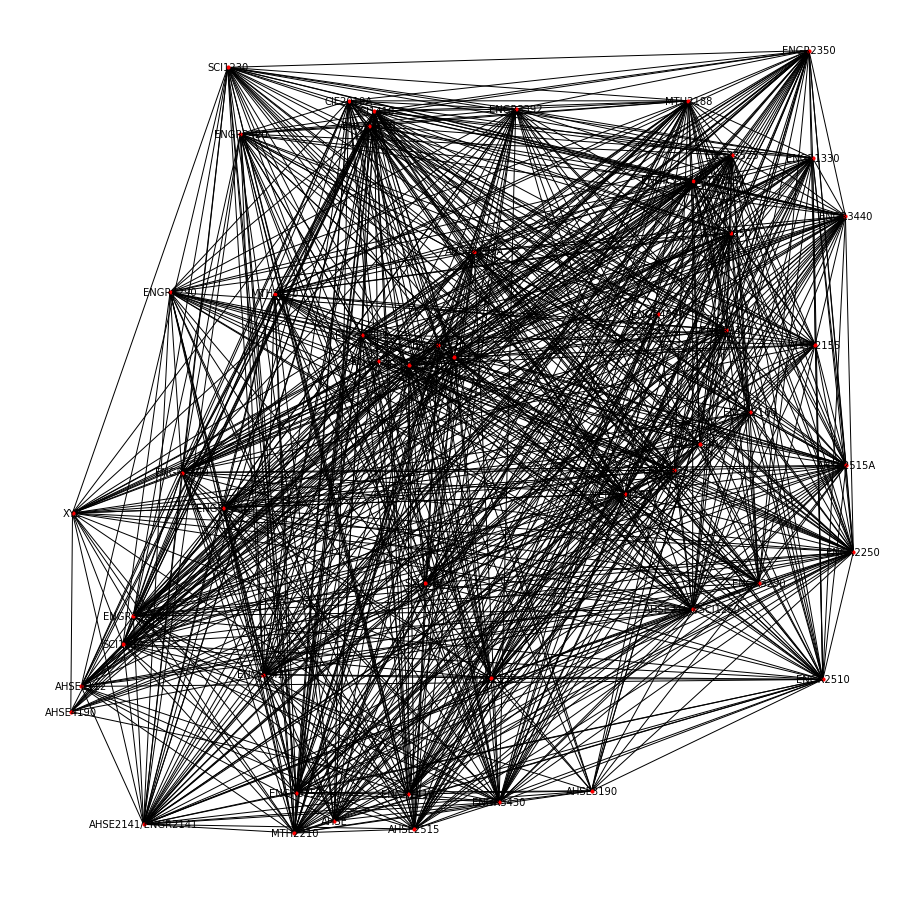

In [111]:
numpy_array = np.array(sorted_conflicts)

G = nx.from_numpy_matrix(numpy_array)
mapping = {}

for idx, course in enumerate(course_list):
    mapping[idx] = course
    
print(mapping)    
# Label nodes from nu
G=nx.relabel_nodes(G,mapping)
print(G.nodes())
plt.figure(1,figsize=(12,12)) 
nx.draw(G, node_size=10, pos=nx.random_layout(G), with_labels=True, font_size=10)
plt.show()

In [112]:
print(G.degree())

[('ENGR3440', 44), ('ENGR3531/MTH2131', 42), ('ENGR3299A', 39), ('ENGR2320', 43), ('AHSE3515', 40), ('AHSE2515', 39), ('MTH2188', 46), ('AHSE2141/ENGR2141', 43), ('MTH2210', 41), ('ENGR3392', 39), ('ENGR2350', 47), ('ENGR3252', 43), ('AHSE2515A', 42), ('ENGR3600', 35), ('ENGR3430', 48), ('AHSE', 27), ('ENGR2160', 27), ('ENGR3370', 44), ('ENGR2510', 41), ('ENGR3345', 38), ('ENGR3420', 40), ('ENGR2410', 39), ('SCI2050', 43), ('ENGR1330', 38), ('SCI1130', 34), ('ENGR3525', 46), ('ENGR4190', 43), ('ENGR2250', 48), ('AHSE1515', 43), ('SUST3301', 31), ('ENGR2330', 40), ('AHSE2155', 29), ('ENGR3290', 33), ('ENGR4290', 30), ('SCI1399', 31), ('ENGR2199', 24), ('ENGR3599', 36), ('SCI1410', 44), ('AHSE2160/SCI1260', 44), ('ENGR3210', 32), ('ENGR2420', 32), ('AHSE0112', 27), ('AHSE2199A', 37), ('XYZ', 28), ('SCI1230', 37), ('CIE2019A', 31), ('AHSE2199', 38), ('AHSE3190', 19), ('ENGR4599', 11), ('MTH3120', 34), ('AHSE4190', 14)]


In [113]:
print(G['ENGR2160'])

{'ENGR3440': {'weight': 3.0}, 'ENGR3531/MTH2131': {'weight': 2.0}, 'ENGR3299A': {'weight': 1.0}, 'AHSE2515': {'weight': 3.0}, 'MTH2188': {'weight': 2.0}, 'ENGR3252': {'weight': 3.0}, 'AHSE2515A': {'weight': 1.0}, 'ENGR3430': {'weight': 2.0}, 'ENGR3370': {'weight': 1.0}, 'ENGR3420': {'weight': 3.0}, 'ENGR2410': {'weight': 1.0}, 'SCI2050': {'weight': 5.0}, 'SCI1130': {'weight': 1.0}, 'ENGR3525': {'weight': 7.0}, 'ENGR4190': {'weight': 10.0}, 'ENGR2250': {'weight': 5.0}, 'ENGR2330': {'weight': 2.0}, 'ENGR3290': {'weight': 1.0}, 'SCI1410': {'weight': 1.0}, 'AHSE2160/SCI1260': {'weight': 2.0}, 'ENGR2420': {'weight': 3.0}, 'AHSE2199A': {'weight': 3.0}, 'XYZ': {'weight': 3.0}, 'AHSE2199': {'weight': 4.0}, 'AHSE4190': {'weight': 1.0}, 'AHSE1515': {'weight': 1.0}, 'CIE2019A': {'weight': 1.0}}
